# Lightgbmを用いた学習サンプル

In [46]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

print(f'lightbgm version: {lgb.__version__}')

np.random.seed(123) # seed

# irisデータセットを使用
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris['feature_names'])
df['y']= pd.Series(iris.target)
df.head()

lightbgm version: 4.1.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Lightgbm APIを使用する例

[1]	Train's multi_logloss: 0.910991	Valid's multi_logloss: 0.952315
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.769602	Valid's multi_logloss: 0.818361
[3]	Train's multi_logloss: 0.656618	Valid's multi_logloss: 0.71228
[4]	Train's multi_logloss: 0.564489	Valid's multi_logloss: 0.626541
[5]	Train's multi_logloss: 0.486651	Valid's multi_logloss: 0.55866
[6]	Train's multi_logloss: 0.421556	Valid's multi_logloss: 0.5028
[7]	Train's multi_logloss: 0.366666	Valid's multi_logloss: 0.456558
[8]	Train's multi_logloss: 0.320078	Valid's multi_logloss: 0.418111
[9]	Train's multi_logloss: 0.280331	Valid's multi_logloss: 0.386092
[10]	Train's multi_logloss: 0.245625	Valid's multi_logloss: 0.358716
[11]	Train's multi_logloss: 0.214268	Valid's multi_logloss: 0.336613
[12]	Train's multi_logloss: 0.187693	Valid's multi_logloss: 0.318848
[13]	Train's multi_logloss: 0.164672	Valid's multi_logloss: 0.304352
[14]	Train's multi_logloss: 0.144297	Valid's multi_logl

/Users/kizawamasakazu/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


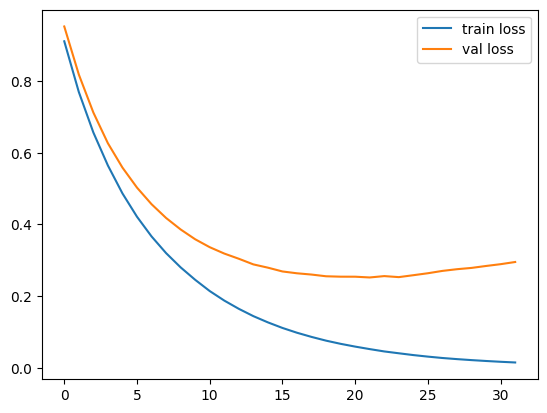

In [47]:
# 訓練データ、検証データ、テストデータに分割
train, val = train_test_split(df, test_size=0.3, shuffle=True, random_state=123)

feature_cols = iris['feature_names']
target_col = 'y'
train_X, train_y = train[feature_cols], train[target_col]
val_X, val_y = val[feature_cols], val[target_col]

# 学習データセット
lgb_train = lgb.Dataset(train_X, train_y)
lgb_val = lgb.Dataset(val_X, val_y, reference=lgb_train)

# ハイパーパラメタ
params = {
    'task': 'train',
    'boosting_type': 'gbdt', # 学習アルゴリズム 
    'objective': 'multiclass', # 目的
    'metric': {'multi_logloss'}, # 損失関数
    'num_class': 3, # 分類クラス数
    'learning_rate': 0.1, # 学習率
    'num_leaves': 21, # ノード数
    'min_data_in_leaf': 3, # 最小ノード数
    'num_iteration': 100, # 繰り返し階数,
    'verbosity': -1, # ロガー出力が邪魔なときは-1を与える
} 

lgb_results = {}

callbacks = [
    lgb.early_stopping(10),
    lgb.log_evaluation(1), # 繰り返し毎に評価結果を表示する
    lgb.record_evaluation(lgb_results),
]
model = lgb.train(
    params=params,
    train_set = lgb_train,
    valid_sets = [lgb_train, lgb_val],
    valid_names = ['Train', 'Valid'],
    num_boost_round=100,
    callbacks=callbacks
)


# 学習結果を表示する
loss_train = lgb_results['Train']['multi_logloss']
loss_test = lgb_results['Valid']['multi_logloss']
best_iteration = model.best_iteration
print(best_iteration)

plt.plot(loss_train, label="train loss")
plt.plot(loss_test, label="val loss")
plt.legend()

In [49]:
# 特徴量重要度
importance = pd.DataFrame(model.feature_importance(), 
                          index=feature_cols, 
                          columns=['importance'])
importance

,importance
sepal length (cm),266
sepal width (cm),235
petal length (cm),395
petal width (cm),180


## scikit-learn APIを使用する場合

In [65]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(verbosity=-1)
model.fit(train_X, train_y, 
          eval_set=[(train_X, train_y), (val_X, val_y),],
          eval_names=['Train', 'Valid'],
          callbacks=callbacks
        )

[1]	Train's multi_logloss: 0.923791	Valid's multi_logloss: 0.950617
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.792246	Valid's multi_logloss: 0.814756
[3]	Train's multi_logloss: 0.685845	Valid's multi_logloss: 0.703937
[4]	Train's multi_logloss: 0.597764	Valid's multi_logloss: 0.617236
[5]	Train's multi_logloss: 0.525146	Valid's multi_logloss: 0.54197
[6]	Train's multi_logloss: 0.463093	Valid's multi_logloss: 0.480099
[7]	Train's multi_logloss: 0.411048	Valid's multi_logloss: 0.427178
[8]	Train's multi_logloss: 0.364928	Valid's multi_logloss: 0.38555
[9]	Train's multi_logloss: 0.326164	Valid's multi_logloss: 0.348096
[10]	Train's multi_logloss: 0.29225	Valid's multi_logloss: 0.317095
[11]	Train's multi_logloss: 0.263021	Valid's multi_logloss: 0.28988
[12]	Train's multi_logloss: 0.237813	Valid's multi_logloss: 0.264959
[13]	Train's multi_logloss: 0.215527	Valid's multi_logloss: 0.246822
[14]	Train's multi_logloss: 0.195645	Valid's multi_logl

LGBMClassifier(verbosity=-1)

## oputunaによるハイパーパラメタ最適化

In [10]:
import optuna.integration.lightgbm as lgb

In [27]:
params = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': 3,
    'verbosity': -1,
    'boosting_type': 'gbdt'
}

In [28]:
lgb_train = lgb.Dataset(train_X, train_y, free_raw_data=False)
lgb_test = lgb.Dataset(test_X, test_y, free_raw_data=False)

model = lgb.train(params=params,
                  train_set = lgb_train,
                  valid_sets = [lgb_train, lgb_test],
                  valid_names = ['Train', 'Test'],
                  num_boost_round = 100,
                  early_stopping_rounds = 10)

[I 2022-12-05 17:55:41,501] A new study created in memory with name: no-name-18127808-d641-4ddd-91f9-32fad586c0f9







  0%|          | 0/7 [00:00<?, ?it/s]






feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed

[1]	Train's multi_logloss: 0.961597	Test's multi_logloss: 0.994312
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.82657	Test's multi_logloss: 0.869771
[3]	Train's multi_logloss: 0.715814	Test's multi_logloss: 0.758378
[4]	Train's multi_logloss: 0.626373	Test's multi_logloss: 0.670365
[5]	Train's multi_logloss: 0.566571	Test's multi_logloss: 0.608839
[6]	Train's multi_logloss: 0.514784	Test's multi_logloss: 0.561541
[7]	Train's multi_logloss: 0.456686	Test's multi_logloss: 0.496802
[8]	Train's multi_logloss: 0.420051	Test's multi_logloss: 0.46401
[9]	Train's multi_logloss: 0.385858	Test's multi_logloss: 0.43665
[10]	Train's multi_logloss: 0.347809	Test's multi_logloss: 0.403835
[11]	Train's multi_logloss: 0.313607	Test's multi_logloss: 0.363108
[12]	Train's multi_logloss: 0.290177	Test's multi_logloss: 0.340111
[13]	Train's multi_logloss: 0.265488	Test's multi_logloss: 0.31311
[14]	Train's multi_logloss: 0.248911	Test's multi_logloss: 0.298196


/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







feature_fraction, val_score: 0.126753:  43%|####2     | 3/7 [00:00<00:00, 13.31it/s]






feature_fraction, val_score: 0.126753:  57%|#####7    | 4/7 [00:00<00:00, 15.54it/s][I 2022-12-05 17:5

[2]	Train's multi_logloss: 0.82657	Test's multi_logloss: 0.869771
[3]	Train's multi_logloss: 0.715814	Test's multi_logloss: 0.758378
[4]	Train's multi_logloss: 0.626373	Test's multi_logloss: 0.670365
[5]	Train's multi_logloss: 0.566571	Test's multi_logloss: 0.608839
[6]	Train's multi_logloss: 0.514784	Test's multi_logloss: 0.561541
[7]	Train's multi_logloss: 0.456686	Test's multi_logloss: 0.496802
[8]	Train's multi_logloss: 0.420051	Test's multi_logloss: 0.46401
[9]	Train's multi_logloss: 0.385858	Test's multi_logloss: 0.43665
[10]	Train's multi_logloss: 0.347809	Test's multi_logloss: 0.403835
[11]	Train's multi_logloss: 0.313607	Test's multi_logloss: 0.363108
[12]	Train's multi_logloss: 0.290177	Test's multi_logloss: 0.340111
[13]	Train's multi_logloss: 0.265488	Test's multi_logloss: 0.31311
[14]	Train's multi_logloss: 0.248911	Test's multi_logloss: 0.298196
[15]	Train's multi_logloss: 0.229827	Test's multi_logloss: 0.280269
[16]	Train's multi_logloss: 0.211773	Test's multi_logloss: 0








feature_fraction, val_score: 0.126753: 100%|##########| 7/7 [00:00<00:00, 15.96it/s]


[36]	Train's multi_logloss: 0.0826988	Test's multi_logloss: 0.14559
[37]	Train's multi_logloss: 0.0797853	Test's multi_logloss: 0.142958
[38]	Train's multi_logloss: 0.0774425	Test's multi_logloss: 0.142516
[39]	Train's multi_logloss: 0.0740158	Test's multi_logloss: 0.142976
[40]	Train's multi_logloss: 0.0722294	Test's multi_logloss: 0.14191
[41]	Train's multi_logloss: 0.0697293	Test's multi_logloss: 0.14042
[42]	Train's multi_logloss: 0.0673221	Test's multi_logloss: 0.139878
[43]	Train's multi_logloss: 0.0643631	Test's multi_logloss: 0.137324
[44]	Train's multi_logloss: 0.0630391	Test's multi_logloss: 0.137418
[45]	Train's multi_logloss: 0.0611069	Test's multi_logloss: 0.136671
[46]	Train's multi_logloss: 0.0589755	Test's multi_logloss: 0.136634
[47]	Train's multi_logloss: 0.0569364	Test's multi_logloss: 0.137439
[48]	Train's multi_logloss: 0.0557758	Test's multi_logloss: 0.1363
[49]	Train's multi_logloss: 0.0536169	Test's multi_logloss: 0.138153
[50]	Train's multi_logloss: 0.0526113	T








  0%|          | 0/20 [00:00<?, ?it/s]






num_leaves, val_score: 0.126753:   0%|          | 0/20 [00:00<?, ?it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







num_leaves, val_score: 0.126753:   0%|          | 0/20 [00:00<?, ?it/s

[1]	Train's multi_logloss: 0.927324	Test's multi_logloss: 0.949367
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.79351	Test's multi_logloss: 0.82415
[3]	Train's multi_logloss: 0.686698	Test's multi_logloss: 0.725249
[4]	Train's multi_logloss: 0.59991	Test's multi_logloss: 0.631974
[5]	Train's multi_logloss: 0.528016	Test's multi_logloss: 0.554335
[6]	Train's multi_logloss: 0.4674	Test's multi_logloss: 0.500966
[7]	Train's multi_logloss: 0.415194	Test's multi_logloss: 0.44998
[8]	Train's multi_logloss: 0.370911	Test's multi_logloss: 0.399967
[9]	Train's multi_logloss: 0.332114	Test's multi_logloss: 0.366134
[10]	Train's multi_logloss: 0.29883	Test's multi_logloss: 0.337421
[11]	Train's multi_logloss: 0.269882	Test's multi_logloss: 0.312309
[12]	Train's multi_logloss: 0.247175	Test's multi_logloss: 0.285542
[13]	Train's multi_logloss: 0.225009	Test's multi_logloss: 0.26654
[14]	Train's multi_logloss: 0.206272	Test's multi_logloss: 0.252381
[15]

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	Train's multi_logloss: 0.927324	Test's multi_logloss: 0.949367
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.79351	Test's multi_logloss: 0.82415
[3]	Train's multi_logloss: 0.686698	Test's multi_logloss: 0.725249
[4]	Train's multi_logloss: 0.59991	Test's multi_logloss: 0.631974
[5]	Train's multi_logloss: 0.528016	Test's multi_logloss: 0.554335
[6]	Train's multi_logloss: 0.4674	Test's multi_logloss: 0.500966
[7]	Train's multi_logloss: 0.415194	Test's multi_logloss: 0.44998
[8]	Train's multi_logloss: 0.370911	Test's multi_logloss: 0.399967
[9]	Train's multi_logloss: 0.332114	Test's multi_logloss: 0.366134
[10]	Train's multi_logloss: 0.29883	Test's multi_logloss: 0.337421
[11]	Train's multi_logloss: 0.269882	Test's multi_logloss: 0.312309
[12]	Train's multi_logloss: 0.247175	Test's multi_logloss: 0.285542
[13]	Train's multi_logloss: 0.225009	Test's multi_logloss: 0.26654
[14]	Train's multi_logloss: 0.206272	Test's multi_logloss: 0.252381
[15]








num_leaves, val_score: 0.126753:  15%|#5        | 3/20 [00:00<00:00, 18.15it/s]






num_leaves, val_score: 0.126753:  20%|##        | 4/20 [00:00<00:00, 17.69it/s][I 2022-12-05 17:55:42,172] Trial 10 finished with value: 0.12675327949894835 and parameters: {'num_leaves': 54}. Best is trial 7 with value: 0.12675327949894835.







num_leaves, val_score: 0.126753:  20%|##        | 4/20 [00:00<00:00, 17.69it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will

[35]	Train's multi_logloss: 0.0610447	Test's multi_logloss: 0.134868
[36]	Train's multi_logloss: 0.0584059	Test's multi_logloss: 0.132889
[37]	Train's multi_logloss: 0.0562902	Test's multi_logloss: 0.132162
[38]	Train's multi_logloss: 0.0537451	Test's multi_logloss: 0.131279
[39]	Train's multi_logloss: 0.0513125	Test's multi_logloss: 0.129852
[40]	Train's multi_logloss: 0.0491261	Test's multi_logloss: 0.128686
[41]	Train's multi_logloss: 0.0476096	Test's multi_logloss: 0.127116
[42]	Train's multi_logloss: 0.0455774	Test's multi_logloss: 0.126753
[43]	Train's multi_logloss: 0.0436874	Test's multi_logloss: 0.127349
[44]	Train's multi_logloss: 0.0424208	Test's multi_logloss: 0.127473
[45]	Train's multi_logloss: 0.0407001	Test's multi_logloss: 0.127993
[46]	Train's multi_logloss: 0.0395981	Test's multi_logloss: 0.128274
[47]	Train's multi_logloss: 0.0386548	Test's multi_logloss: 0.130795
[48]	Train's multi_logloss: 0.0374471	Test's multi_logloss: 0.129735
[49]	Train's multi_logloss: 0.0359








num_leaves, val_score: 0.126753:  30%|###       | 6/20 [00:00<00:00, 16.73it/s][I 2022-12-05 17:55:42,358] Trial 13 finished with value: 0.12675327949894835 and parameters: {'num_leaves': 234}. Best is trial 7 with value: 0.12675327949894835.







num_leaves, val_score: 0.126753:  35%|###5      | 7/20 [00:00<00:00, 16.73it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'ca

[50]	Train's multi_logloss: 0.0350791	Test's multi_logloss: 0.132584
[51]	Train's multi_logloss: 0.0335025	Test's multi_logloss: 0.133517
[52]	Train's multi_logloss: 0.0322575	Test's multi_logloss: 0.134951
Early stopping, best iteration is:
[42]	Train's multi_logloss: 0.0455774	Test's multi_logloss: 0.126753
[1]	Train's multi_logloss: 0.927324	Test's multi_logloss: 0.949367
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.79351	Test's multi_logloss: 0.82415
[3]	Train's multi_logloss: 0.686698	Test's multi_logloss: 0.725249
[4]	Train's multi_logloss: 0.59991	Test's multi_logloss: 0.631974
[5]	Train's multi_logloss: 0.528016	Test's multi_logloss: 0.554335
[6]	Train's multi_logloss: 0.4674	Test's multi_logloss: 0.500966
[7]	Train's multi_logloss: 0.415194	Test's multi_logloss: 0.44998
[8]	Train's multi_logloss: 0.370911	Test's multi_logloss: 0.399967
[9]	Train's multi_logloss: 0.332114	Test's multi_logloss: 0.366134
[10]	Train's multi_logloss: 0.2








num_leaves, val_score: 0.126753:  45%|####5     | 9/20 [00:00<00:00, 16.95it/s]






num_leaves, val_score: 0.126753:  50%|#####     | 10/20 [00:00<00:00, 17.40it/s][I 2022-12-05 17:55:42,525] Trial 16 finished with value: 0.12675327949894835 and parameters: {'num_leaves': 39}. Best is trial 7 with value: 0.12675327949894835.







num_leaves, val_score: 0.126753:  50%|#####     | 10/20 [00:00<00:00, 17.40it/s]

[1]	Train's multi_logloss: 0.927324	Test's multi_logloss: 0.949367
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.79351	Test's multi_logloss: 0.82415
[3]	Train's multi_logloss: 0.686698	Test's multi_logloss: 0.725249
[4]	Train's multi_logloss: 0.59991	Test's multi_logloss: 0.631974
[5]	Train's multi_logloss: 0.528016	Test's multi_logloss: 0.554335
[6]	Train's multi_logloss: 0.4674	Test's multi_logloss: 0.500966
[7]	Train's multi_logloss: 0.415194	Test's multi_logloss: 0.44998
[8]	Train's multi_logloss: 0.370911	Test's multi_logloss: 0.399967
[9]	Train's multi_logloss: 0.332114	Test's multi_logloss: 0.366134
[10]	Train's multi_logloss: 0.29883	Test's multi_logloss: 0.337421
[11]	Train's multi_logloss: 0.269882	Test's multi_logloss: 0.312309
[12]	Train's multi_logloss: 0.247175	Test's multi_logloss: 0.285542
[13]	Train's multi_logloss: 0.225009	Test's multi_logloss: 0.26654
[14]	Train's multi_logloss: 0.206272	Test's multi_logloss: 0.252381
[15]

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







num_leaves, val_score: 0.126753:  50%|#####     | 10/20 [00:00<00:00, 17.40it/s][I 2022-12-05 17:55:42,585] Trial 17 finished with value: 0.12675327949894835 and parameters: {'num_leaves': 146}

[27]	Train's multi_logloss: 0.0927729	Test's multi_logloss: 0.154641
[28]	Train's multi_logloss: 0.0875114	Test's multi_logloss: 0.15146
[29]	Train's multi_logloss: 0.0832195	Test's multi_logloss: 0.148367
[30]	Train's multi_logloss: 0.0795366	Test's multi_logloss: 0.146087
[31]	Train's multi_logloss: 0.0754866	Test's multi_logloss: 0.144371
[32]	Train's multi_logloss: 0.0712451	Test's multi_logloss: 0.141056
[33]	Train's multi_logloss: 0.0674222	Test's multi_logloss: 0.138191
[34]	Train's multi_logloss: 0.0643148	Test's multi_logloss: 0.136377
[35]	Train's multi_logloss: 0.0610447	Test's multi_logloss: 0.134868
[36]	Train's multi_logloss: 0.0584059	Test's multi_logloss: 0.132889
[37]	Train's multi_logloss: 0.0562902	Test's multi_logloss: 0.132162
[38]	Train's multi_logloss: 0.0537451	Test's multi_logloss: 0.131279
[39]	Train's multi_logloss: 0.0513125	Test's multi_logloss: 0.129852
[40]	Train's multi_logloss: 0.0491261	Test's multi_logloss: 0.128686
[41]	Train's multi_logloss: 0.04760








num_leaves, val_score: 0.126753:  65%|######5   | 13/20 [00:00<00:00, 17.15it/s]






num_leaves, val_score: 0.126753:  70%|#######   | 14/20 [00:00<00:00, 15.96it/s][I 2022-12-05 17:55:42,788] Trial 20 finished with value: 0.12675327949894835 and parameters: {'num_leaves': 104}. Best is trial 7 with value: 0.12675327949894835.







num_leaves, val_score: 0.126753:  70%|#######   | 14/20 [00:00<00:00, 15.96it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and 

[33]	Train's multi_logloss: 0.0674222	Test's multi_logloss: 0.138191
[34]	Train's multi_logloss: 0.0643148	Test's multi_logloss: 0.136377
[35]	Train's multi_logloss: 0.0610447	Test's multi_logloss: 0.134868
[36]	Train's multi_logloss: 0.0584059	Test's multi_logloss: 0.132889
[37]	Train's multi_logloss: 0.0562902	Test's multi_logloss: 0.132162
[38]	Train's multi_logloss: 0.0537451	Test's multi_logloss: 0.131279
[39]	Train's multi_logloss: 0.0513125	Test's multi_logloss: 0.129852
[40]	Train's multi_logloss: 0.0491261	Test's multi_logloss: 0.128686
[41]	Train's multi_logloss: 0.0476096	Test's multi_logloss: 0.127116
[42]	Train's multi_logloss: 0.0455774	Test's multi_logloss: 0.126753
[43]	Train's multi_logloss: 0.0436874	Test's multi_logloss: 0.127349
[44]	Train's multi_logloss: 0.0424208	Test's multi_logloss: 0.127473
[45]	Train's multi_logloss: 0.0407001	Test's multi_logloss: 0.127993
[46]	Train's multi_logloss: 0.0395981	Test's multi_logloss: 0.128274
[47]	Train's multi_logloss: 0.0386

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







num_leaves, val_score: 0.126753:  80%|########  | 16/20 [00:01<00:00, 16.24it/s][I 2022-12-05 17:55:42,964] Trial 23 finished with value: 0.12675327949894835 and parameters: {'num_leaves': 203}

[51]	Train's multi_logloss: 0.0335025	Test's multi_logloss: 0.133517
[52]	Train's multi_logloss: 0.0322575	Test's multi_logloss: 0.134951
Early stopping, best iteration is:
[42]	Train's multi_logloss: 0.0455774	Test's multi_logloss: 0.126753
[1]	Train's multi_logloss: 0.927324	Test's multi_logloss: 0.949367
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.79351	Test's multi_logloss: 0.82415
[3]	Train's multi_logloss: 0.686698	Test's multi_logloss: 0.725249
[4]	Train's multi_logloss: 0.59991	Test's multi_logloss: 0.631974
[5]	Train's multi_logloss: 0.528016	Test's multi_logloss: 0.554335
[6]	Train's multi_logloss: 0.4674	Test's multi_logloss: 0.500966
[7]	Train's multi_logloss: 0.415194	Test's multi_logloss: 0.44998
[8]	Train's multi_logloss: 0.370911	Test's multi_logloss: 0.399967
[9]	Train's multi_logloss: 0.332114	Test's multi_logloss: 0.366134
[10]	Train's multi_logloss: 0.29883	Test's multi_logloss: 0.337421
[11]	Train's multi_logloss: 0.269








  0%|          | 0/10 [00:00<?, ?it/s]






bagging, val_score: 0.126753:   0%|          | 0/10 [00:00<?, ?it/s]

[1]	Train's multi_logloss: 0.970983	Test's multi_logloss: 1.00473
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.865363	Test's multi_logloss: 0.896098
[3]	Train's multi_logloss: 0.782923	Test's multi_logloss: 0.810542
[4]	Train's multi_logloss: 0.713989	Test's multi_logloss: 0.739446
[5]	Train's multi_logloss: 0.644474	Test's multi_logloss: 0.670015
[6]	Train's multi_logloss: 0.587688	Test's multi_logloss: 0.612283
[7]	Train's multi_logloss: 0.537786	Test's multi_logloss: 0.560803
[8]	Train's multi_logloss: 0.496073	Test's multi_logloss: 0.514067
[9]	Train's multi_logloss: 0.454813	Test's multi_logloss: 0.475046
[10]	Train's multi_logloss: 0.421013	Test's multi_logloss: 0.439304
[11]	Train's multi_logloss: 0.391768	Test's multi_logloss: 0.419348
[12]	Train's multi_logloss: 0.365787	Test's multi_logloss: 0.390073
[13]	Train's multi_logloss: 0.341967	Test's multi_logloss: 0.361657
[14]	Train's multi_logloss: 0.322282	Test's multi_logloss: 0.3372

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







bagging, val_score: 0.109963:   0%|          | 0/10 [00:00<?, ?it/s][I 2022-12-05 17:55:43,187] Trial 27 finished with value: 0.1099633474021663 and parameters: {'bagging_fraction': 0.499081136

[32]	Train's multi_logloss: 0.13644	Test's multi_logloss: 0.151872
[33]	Train's multi_logloss: 0.133003	Test's multi_logloss: 0.146903
[34]	Train's multi_logloss: 0.130044	Test's multi_logloss: 0.14244
[35]	Train's multi_logloss: 0.124945	Test's multi_logloss: 0.138283
[36]	Train's multi_logloss: 0.121177	Test's multi_logloss: 0.135396
[37]	Train's multi_logloss: 0.118879	Test's multi_logloss: 0.133152
[38]	Train's multi_logloss: 0.116572	Test's multi_logloss: 0.130617
[39]	Train's multi_logloss: 0.11407	Test's multi_logloss: 0.130478
[40]	Train's multi_logloss: 0.111441	Test's multi_logloss: 0.129886
[41]	Train's multi_logloss: 0.109607	Test's multi_logloss: 0.124875
[42]	Train's multi_logloss: 0.108318	Test's multi_logloss: 0.120658
[43]	Train's multi_logloss: 0.107083	Test's multi_logloss: 0.118698
[44]	Train's multi_logloss: 0.106074	Test's multi_logloss: 0.117098
[45]	Train's multi_logloss: 0.103851	Test's multi_logloss: 0.114
[46]	Train's multi_logloss: 0.101098	Test's multi_logl








bagging, val_score: 0.103246:  30%|###       | 3/10 [00:00<00:00, 19.76it/s]






bagging, val_score: 0.103246:  40%|####      | 4/10 [00:00<00:00, 18.99it/s][I 2022-12-05 17:55:43,343] Trial 30 finished with value: 0.12040370428541156 and parameters: {'bagging_fraction': 0.7888309629614069, 'bagging_freq': 2}. Best is trial 29 with value: 0.10324579112002029.







bagging, val_score: 0.103246:  40%|####      | 4/10 [00:00<00:00, 18.99it/s]

[55]	Train's multi_logloss: 0.0400285	Test's multi_logloss: 0.128787
[56]	Train's multi_logloss: 0.0387414	Test's multi_logloss: 0.127935
Early stopping, best iteration is:
[46]	Train's multi_logloss: 0.0498396	Test's multi_logloss: 0.120404
[1]	Train's multi_logloss: 0.93081	Test's multi_logloss: 0.957949
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.798184	Test's multi_logloss: 0.818041
[3]	Train's multi_logloss: 0.688582	Test's multi_logloss: 0.714116
[4]	Train's multi_logloss: 0.601638	Test's multi_logloss: 0.626247
[5]	Train's multi_logloss: 0.52699	Test's multi_logloss: 0.545814
[6]	Train's multi_logloss: 0.468274	Test's multi_logloss: 0.491675
[7]	Train's multi_logloss: 0.416862	Test's multi_logloss: 0.44832
[8]	Train's multi_logloss: 0.376628	Test's multi_logloss: 0.403093
[9]	Train's multi_logloss: 0.34005	Test's multi_logloss: 0.369852
[10]	Train's multi_logloss: 0.309723	Test's multi_logloss: 0.338542
[11]	Train's multi_logloss: 0.

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







bagging, val_score: 0.103246:  40%|####      | 4/10 [00:00<00:00, 18.99it/s][I 2022-12-05 17:55:43,402] Trial 31 finished with value: 0.11830729855377409 and parameters: {'bagging_fraction': 0.

[18]	Train's multi_logloss: 0.16254	Test's multi_logloss: 0.198043
[19]	Train's multi_logloss: 0.151596	Test's multi_logloss: 0.190624
[20]	Train's multi_logloss: 0.143874	Test's multi_logloss: 0.183809
[21]	Train's multi_logloss: 0.135868	Test's multi_logloss: 0.170361
[22]	Train's multi_logloss: 0.129775	Test's multi_logloss: 0.162385
[23]	Train's multi_logloss: 0.123566	Test's multi_logloss: 0.157518
[24]	Train's multi_logloss: 0.117066	Test's multi_logloss: 0.153852
[25]	Train's multi_logloss: 0.113011	Test's multi_logloss: 0.151597
[26]	Train's multi_logloss: 0.109927	Test's multi_logloss: 0.148823
[27]	Train's multi_logloss: 0.105795	Test's multi_logloss: 0.14435
[28]	Train's multi_logloss: 0.100281	Test's multi_logloss: 0.140552
[29]	Train's multi_logloss: 0.0966344	Test's multi_logloss: 0.140862
[30]	Train's multi_logloss: 0.0940158	Test's multi_logloss: 0.139371
[31]	Train's multi_logloss: 0.0905803	Test's multi_logloss: 0.136022
[32]	Train's multi_logloss: 0.087477	Test's mul

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[17]	Train's multi_logloss: 0.165525	Test's multi_logloss: 0.219456
[18]	Train's multi_logloss: 0.154412	Test's multi_logloss: 0.207581
[19]	Train's multi_logloss: 0.14473	Test's multi_logloss: 0.197461
[20]	Train's multi_logloss: 0.135923	Test's multi_logloss: 0.187234
[21]	Train's multi_logloss: 0.12707	Test's multi_logloss: 0.178675
[22]	Train's multi_logloss: 0.119504	Test's multi_logloss: 0.17569
[23]	Train's multi_logloss: 0.113785	Test's multi_logloss: 0.172246
[24]	Train's multi_logloss: 0.107772	Test's multi_logloss: 0.167316
[25]	Train's multi_logloss: 0.102108	Test's multi_logloss: 0.164243
[26]	Train's multi_logloss: 0.0981135	Test's multi_logloss: 0.155023
[27]	Train's multi_logloss: 0.0947196	Test's multi_logloss: 0.152903
[28]	Train's multi_logloss: 0.0895174	Test's multi_logloss: 0.150121
[29]	Train's multi_logloss: 0.0847641	Test's multi_logloss: 0.149999
[30]	Train's multi_logloss: 0.0807569	Test's multi_logloss: 0.147478
[31]	Train's multi_logloss: 0.0766824	Test's m








bagging, val_score: 0.096754:  70%|#######   | 7/10 [00:00<00:00, 17.59it/s]






bagging, val_score: 0.096754:  80%|########  | 8/10 [00:00<00:00, 17.20it/s][I 2022-12-05 17:55:43,587] Trial 34 finished with value: 0.12946376315311306 and parameters: {'bagging_fraction': 0.9356520254663123, 'bagging_freq': 1}. Best is trial 33 with value: 0.09675416222275754.







bagging, val_score: 0.096754:  80%|########  | 8/10 [00:00<00:00, 17.20it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval

[40]	Train's multi_logloss: 0.0493662	Test's multi_logloss: 0.134755
[41]	Train's multi_logloss: 0.0479244	Test's multi_logloss: 0.134771
[42]	Train's multi_logloss: 0.0457913	Test's multi_logloss: 0.132151
[43]	Train's multi_logloss: 0.0443701	Test's multi_logloss: 0.129538
[44]	Train's multi_logloss: 0.0429293	Test's multi_logloss: 0.129641
[45]	Train's multi_logloss: 0.0412328	Test's multi_logloss: 0.130026
[46]	Train's multi_logloss: 0.0400501	Test's multi_logloss: 0.130254
[47]	Train's multi_logloss: 0.0383691	Test's multi_logloss: 0.129464
[48]	Train's multi_logloss: 0.0370071	Test's multi_logloss: 0.130503
[49]	Train's multi_logloss: 0.0352938	Test's multi_logloss: 0.132098
[50]	Train's multi_logloss: 0.0344215	Test's multi_logloss: 0.132203
[51]	Train's multi_logloss: 0.0327552	Test's multi_logloss: 0.136444
[52]	Train's multi_logloss: 0.0316424	Test's multi_logloss: 0.13931
[53]	Train's multi_logloss: 0.0303736	Test's multi_logloss: 0.138647
[54]	Train's multi_logloss: 0.02974








  0%|          | 0/6 [00:00<?, ?it/s]






feature_fraction_stage2, val_score: 0.096754:   0%|          | 0/6 [00:00<?, ?it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	Train's multi_logloss: 0.983222	Test's multi_logloss: 1.01807
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.88597	Test's multi_logloss: 0.923548
[3]	Train's multi_logloss: 0.806014	Test's multi_logloss: 0.840006
[4]	Train's multi_logloss: 0.738065	Test's multi_logloss: 0.767251
[5]	Train's multi_logloss: 0.673282	Test's multi_logloss: 0.698602
[6]	Train's multi_logloss: 0.617878	Test's multi_logloss: 0.643634
[7]	Train's multi_logloss: 0.57934	Test's multi_logloss: 0.602583
[8]	Train's multi_logloss: 0.541765	Test's multi_logloss: 0.560331
[9]	Train's multi_logloss: 0.50884	Test's multi_logloss: 0.523347
[10]	Train's multi_logloss: 0.479527	Test's multi_logloss: 0.490092
[11]	Train's multi_logloss: 0.451586	Test's multi_logloss: 0.457504
[12]	Train's multi_logloss: 0.419615	Test's multi_logloss: 0.426636
[13]	Train's multi_logloss: 0.386908	Test's multi_logloss: 0.3914
[14]	Train's multi_logloss: 0.359833	Test's multi_logloss: 0.360838
[1








feature_fraction_stage2, val_score: 0.096754:   0%|          | 0/6 [00:00<?, ?it/s][I 2022-12-05 17:55:43,744] Trial 37 finished with value: 0.09675416222275754 and parameters: {'feature_fraction': 0.748}. Best is trial 37 with value: 0.09675416222275754.







feature_fraction_stage2, val_score: 0.096754:  17%|#6        | 1/6 [00:00<00:00, 18.10it/s]

[1]	Train's multi_logloss: 0.983222	Test's multi_logloss: 1.01807
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.88597	Test's multi_logloss: 0.923548
[3]	Train's multi_logloss: 0.806014	Test's multi_logloss: 0.840006
[4]	Train's multi_logloss: 0.738065	Test's multi_logloss: 0.767251
[5]	Train's multi_logloss: 0.673282	Test's multi_logloss: 0.698602
[6]	Train's multi_logloss: 0.617878	Test's multi_logloss: 0.643634
[7]	Train's multi_logloss: 0.57934	Test's multi_logloss: 0.602583
[8]	Train's multi_logloss: 0.541765	Test's multi_logloss: 0.560331
[9]	Train's multi_logloss: 0.50884	Test's multi_logloss: 0.523347
[10]	Train's multi_logloss: 0.479527	Test's multi_logloss: 0.490092
[11]	Train's multi_logloss: 0.451586	Test's multi_logloss: 0.457504
[12]	Train's multi_logloss: 0.419615	Test's multi_logloss: 0.426636
[13]	Train's multi_logloss: 0.386908	Test's multi_logloss: 0.3914
[14]	Train's multi_logloss: 0.359833	Test's multi_logloss: 0.360838
[1

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







feature_fraction_stage2, val_score: 0.096754:  17%|#6        | 1/6 [00:00<00:00,  9.40it/s]






feature_fraction_stage2, val_score: 0.096754:  33%|###3      | 2/6 [00:00<00:00, 18.73it/s][I 2

[30]	Train's multi_logloss: 0.199206	Test's multi_logloss: 0.184972
[31]	Train's multi_logloss: 0.195468	Test's multi_logloss: 0.182073
[32]	Train's multi_logloss: 0.191326	Test's multi_logloss: 0.178801
[33]	Train's multi_logloss: 0.182914	Test's multi_logloss: 0.173068
[34]	Train's multi_logloss: 0.17542	Test's multi_logloss: 0.167818
[35]	Train's multi_logloss: 0.168744	Test's multi_logloss: 0.163168
[36]	Train's multi_logloss: 0.164981	Test's multi_logloss: 0.161201
[37]	Train's multi_logloss: 0.159243	Test's multi_logloss: 0.152001
[38]	Train's multi_logloss: 0.155178	Test's multi_logloss: 0.147804
[39]	Train's multi_logloss: 0.151789	Test's multi_logloss: 0.14432
[40]	Train's multi_logloss: 0.149042	Test's multi_logloss: 0.14164
[41]	Train's multi_logloss: 0.145128	Test's multi_logloss: 0.135229
[42]	Train's multi_logloss: 0.141753	Test's multi_logloss: 0.129721
[43]	Train's multi_logloss: 0.14036	Test's multi_logloss: 0.127913
[44]	Train's multi_logloss: 0.139153	Test's multi_lo








feature_fraction_stage2, val_score: 0.096754:  50%|#####     | 3/6 [00:00<00:00, 18.73it/s]






feature_fraction_stage2, val_score: 0.096754:  67%|######6   | 4/6 [00:00<00:00, 18.68it/s][I 2022-12-05 17:55:43,905] Trial 40 finished with value: 0.09675416222275754 and parameters: {'feature_fraction': 0.7799999999999999}. Best is trial 37 with value: 0.09675416222275754.







feature_fraction_stage2, val_score: 0.096754:  67%|######6   | 4/6 [00:00<00:00, 18.68it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: 

[69]	Train's multi_logloss: 0.106358	Test's multi_logloss: 0.0995676
[70]	Train's multi_logloss: 0.106068	Test's multi_logloss: 0.100975
[71]	Train's multi_logloss: 0.104974	Test's multi_logloss: 0.10047
[72]	Train's multi_logloss: 0.104922	Test's multi_logloss: 0.10199
[73]	Train's multi_logloss: 0.104442	Test's multi_logloss: 0.101984
[74]	Train's multi_logloss: 0.104442	Test's multi_logloss: 0.101984
[75]	Train's multi_logloss: 0.102982	Test's multi_logloss: 0.100988
[76]	Train's multi_logloss: 0.101918	Test's multi_logloss: 0.100274
[77]	Train's multi_logloss: 0.102118	Test's multi_logloss: 0.0978103
Early stopping, best iteration is:
[67]	Train's multi_logloss: 0.107474	Test's multi_logloss: 0.0967542
[1]	Train's multi_logloss: 0.977312	Test's multi_logloss: 0.998967
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.881351	Test's multi_logloss: 0.90664
[3]	Train's multi_logloss: 0.803834	Test's multi_logloss: 0.829691
[4]	Train's multi_loglo








feature_fraction_stage2, val_score: 0.096754:  67%|######6   | 4/6 [00:00<00:00, 18.68it/s][I 2022-12-05 17:55:43,964] Trial 41 finished with value: 0.10945861046778566 and parameters: {'feature_fraction': 0.62}. Best is trial 37 with value: 0.09675416222275754.







feature_fraction_stage2, val_score: 0.096754:  83%|########3 | 5/6 [00:00<00:00, 18.68it/s]

[67]	Train's multi_logloss: 0.122246	Test's multi_logloss: 0.116472
[68]	Train's multi_logloss: 0.122246	Test's multi_logloss: 0.116472
[69]	Train's multi_logloss: 0.119939	Test's multi_logloss: 0.115911
[70]	Train's multi_logloss: 0.120437	Test's multi_logloss: 0.115856
[71]	Train's multi_logloss: 0.118484	Test's multi_logloss: 0.115432
[72]	Train's multi_logloss: 0.119125	Test's multi_logloss: 0.115435
[73]	Train's multi_logloss: 0.117444	Test's multi_logloss: 0.115114
[74]	Train's multi_logloss: 0.116696	Test's multi_logloss: 0.112344
[75]	Train's multi_logloss: 0.111679	Test's multi_logloss: 0.109459
[76]	Train's multi_logloss: 0.106765	Test's multi_logloss: 0.109797
[77]	Train's multi_logloss: 0.103803	Test's multi_logloss: 0.110519
[78]	Train's multi_logloss: 0.0998329	Test's multi_logloss: 0.111436
[79]	Train's multi_logloss: 0.0974835	Test's multi_logloss: 0.114567
[80]	Train's multi_logloss: 0.0960764	Test's multi_logloss: 0.117731
[81]	Train's multi_logloss: 0.0956673	Test's 

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







feature_fraction_stage2, val_score: 0.096754:  83%|########3 | 5/6 [00:00<00:00, 18.68it/s]






feature_fraction_stage2, val_score: 0.096754: 100%|##########| 6/6 [00:00<00:00, 18.16it/s]


[1]	Train's multi_logloss: 0.983222	Test's multi_logloss: 1.01807
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.88597	Test's multi_logloss: 0.923548
[3]	Train's multi_logloss: 0.806014	Test's multi_logloss: 0.840006
[4]	Train's multi_logloss: 0.738065	Test's multi_logloss: 0.767251
[5]	Train's multi_logloss: 0.673282	Test's multi_logloss: 0.698602
[6]	Train's multi_logloss: 0.617878	Test's multi_logloss: 0.643634
[7]	Train's multi_logloss: 0.57934	Test's multi_logloss: 0.602583
[8]	Train's multi_logloss: 0.541765	Test's multi_logloss: 0.560331
[9]	Train's multi_logloss: 0.50884	Test's multi_logloss: 0.523347
[10]	Train's multi_logloss: 0.479527	Test's multi_logloss: 0.490092
[11]	Train's multi_logloss: 0.451586	Test's multi_logloss: 0.457504
[12]	Train's multi_logloss: 0.419615	Test's multi_logloss: 0.426636
[13]	Train's multi_logloss: 0.386908	Test's multi_logloss: 0.3914
[14]	Train's multi_logloss: 0.359833	Test's multi_logloss: 0.360838
[1








  0%|          | 0/20 [00:00<?, ?it/s]






regularization_factors, val_score: 0.096754:   0%|          | 0/20 [00:00<?, ?it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







regularization_factors, val_score: 0.096754:   0%|        

[1]	Train's multi_logloss: 0.983262	Test's multi_logloss: 1.01811
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.886037	Test's multi_logloss: 0.92361
[3]	Train's multi_logloss: 0.806098	Test's multi_logloss: 0.840087
[4]	Train's multi_logloss: 0.73816	Test's multi_logloss: 0.767346
[5]	Train's multi_logloss: 0.673387	Test's multi_logloss: 0.698709
[6]	Train's multi_logloss: 0.61799	Test's multi_logloss: 0.643749
[7]	Train's multi_logloss: 0.579458	Test's multi_logloss: 0.602705
[8]	Train's multi_logloss: 0.541886	Test's multi_logloss: 0.56046
[9]	Train's multi_logloss: 0.508963	Test's multi_logloss: 0.523479
[10]	Train's multi_logloss: 0.479652	Test's multi_logloss: 0.490228
[11]	Train's multi_logloss: 0.451713	Test's multi_logloss: 0.457644
[12]	Train's multi_logloss: 0.419749	Test's multi_logloss: 0.426779
[13]	Train's multi_logloss: 0.387047	Test's multi_logloss: 0.39155
[14]	Train's multi_logloss: 0.359972	Test's multi_logloss: 0.360991
[1

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







regularization_factors, val_score: 0.096754:   5%|5         | 1/20 [00:00<00:01, 10.59it/s][I 2022-12-05 17:55:44,117] Trial 44 finished with value: 0.12258137319681053 and parameters: {'lambda

[35]	Train's multi_logloss: 0.193396	Test's multi_logloss: 0.183647
[36]	Train's multi_logloss: 0.189731	Test's multi_logloss: 0.18165
[37]	Train's multi_logloss: 0.183369	Test's multi_logloss: 0.171676
[38]	Train's multi_logloss: 0.179289	Test's multi_logloss: 0.166977
[39]	Train's multi_logloss: 0.17588	Test's multi_logloss: 0.163041
[40]	Train's multi_logloss: 0.173112	Test's multi_logloss: 0.159954
[41]	Train's multi_logloss: 0.168695	Test's multi_logloss: 0.153038
[42]	Train's multi_logloss: 0.164846	Test's multi_logloss: 0.147065
[43]	Train's multi_logloss: 0.163345	Test's multi_logloss: 0.145306
[44]	Train's multi_logloss: 0.160953	Test's multi_logloss: 0.14146
[45]	Train's multi_logloss: 0.15878	Test's multi_logloss: 0.137945
[46]	Train's multi_logloss: 0.156801	Test's multi_logloss: 0.134725
[47]	Train's multi_logloss: 0.155638	Test's multi_logloss: 0.13215
[48]	Train's multi_logloss: 0.153938	Test's multi_logloss: 0.129392
[49]	Train's multi_logloss: 0.15261	Test's multi_logl

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[45]	Train's multi_logloss: 0.218884	Test's multi_logloss: 0.213476
[46]	Train's multi_logloss: 0.215648	Test's multi_logloss: 0.209192
[47]	Train's multi_logloss: 0.21363	Test's multi_logloss: 0.205977
[48]	Train's multi_logloss: 0.211735	Test's multi_logloss: 0.202952
[49]	Train's multi_logloss: 0.210627	Test's multi_logloss: 0.201944
[50]	Train's multi_logloss: 0.21002	Test's multi_logloss: 0.201027
[51]	Train's multi_logloss: 0.209456	Test's multi_logloss: 0.200168
[52]	Train's multi_logloss: 0.207222	Test's multi_logloss: 0.198051
[53]	Train's multi_logloss: 0.205792	Test's multi_logloss: 0.196259
[54]	Train's multi_logloss: 0.205333	Test's multi_logloss: 0.195548
[55]	Train's multi_logloss: 0.204254	Test's multi_logloss: 0.194744
[56]	Train's multi_logloss: 0.203576	Test's multi_logloss: 0.194101
[57]	Train's multi_logloss: 0.200972	Test's multi_logloss: 0.192462
[58]	Train's multi_logloss: 0.200972	Test's multi_logloss: 0.192462
[59]	Train's multi_logloss: 0.199092	Test's multi_








regularization_factors, val_score: 0.096754:  10%|#         | 2/20 [00:00<00:01, 12.22it/s]






regularization_factors, val_score: 0.096754:  15%|#5        | 3/20 [00:00<00:00, 18.28it/s][I 2022-12-05 17:55:44,187] Trial 45 finished with value: 0.13532380506233976 and parameters: {'lambda_l1': 7.668092566795717e-06, 'lambda_l2': 2.439901638633852}. Best is trial 43 with value: 0.11618536004197835.







regularization_factors, val_score: 0.096754:  15%|#5        | 3/20 [00:00<00:00, 18.28it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packa

[81]	Train's multi_logloss: 0.154484	Test's multi_logloss: 0.145791
[82]	Train's multi_logloss: 0.153228	Test's multi_logloss: 0.144855
[83]	Train's multi_logloss: 0.151316	Test's multi_logloss: 0.144477
[84]	Train's multi_logloss: 0.149191	Test's multi_logloss: 0.143227
[85]	Train's multi_logloss: 0.146704	Test's multi_logloss: 0.141923
[86]	Train's multi_logloss: 0.145313	Test's multi_logloss: 0.142032
[87]	Train's multi_logloss: 0.144074	Test's multi_logloss: 0.14223
[88]	Train's multi_logloss: 0.14174	Test's multi_logloss: 0.141076
[89]	Train's multi_logloss: 0.140289	Test's multi_logloss: 0.140531
[90]	Train's multi_logloss: 0.139049	Test's multi_logloss: 0.139913
[91]	Train's multi_logloss: 0.137681	Test's multi_logloss: 0.139618
[92]	Train's multi_logloss: 0.136724	Test's multi_logloss: 0.138929
[93]	Train's multi_logloss: 0.13581	Test's multi_logloss: 0.138495
[94]	Train's multi_logloss: 0.135001	Test's multi_logloss: 0.138126
[95]	Train's multi_logloss: 0.134492	Test's multi_l








regularization_factors, val_score: 0.093987:  15%|#5        | 3/20 [00:00<00:00, 18.28it/s][I 2022-12-05 17:55:44,238] Trial 46 finished with value: 0.0939874474503158 and parameters: {'lambda_l1': 0.03850625556053545, 'lambda_l2': 0.0045965525980078}. Best is trial 46 with value: 0.0939874474503158.







regularization_factors, val_score: 0.093987:  20%|##        | 4/20 [00:00<00:00, 18.28it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in

[66]	Train's multi_logloss: 0.105657	Test's multi_logloss: 0.0939874
[67]	Train's multi_logloss: 0.104392	Test's multi_logloss: 0.094621
[68]	Train's multi_logloss: 0.104039	Test's multi_logloss: 0.0953626
[69]	Train's multi_logloss: 0.103752	Test's multi_logloss: 0.0970201
[70]	Train's multi_logloss: 0.103624	Test's multi_logloss: 0.0985786
[71]	Train's multi_logloss: 0.102833	Test's multi_logloss: 0.0984346
[72]	Train's multi_logloss: 0.102922	Test's multi_logloss: 0.0999829
[73]	Train's multi_logloss: 0.102922	Test's multi_logloss: 0.0999829
[74]	Train's multi_logloss: 0.101323	Test's multi_logloss: 0.0999253
[75]	Train's multi_logloss: 0.100146	Test's multi_logloss: 0.0991173
[76]	Train's multi_logloss: 0.100229	Test's multi_logloss: 0.0965756
Early stopping, best iteration is:
[66]	Train's multi_logloss: 0.105657	Test's multi_logloss: 0.0939874
[1]	Train's multi_logloss: 0.983223	Test's multi_logloss: 1.01807
Training until validation scores don't improve for 10 rounds
[2]	Train's

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







regularization_factors, val_score: 0.093987:  25%|##5       | 5/20 [00:00<00:00, 18.84it/s][I 2022-12-05 17:55:44,342] Trial 48 finished with value: 0.09675420749377965 and parameters: {'lambda

[7]	Train's multi_logloss: 0.57934	Test's multi_logloss: 0.602583
[8]	Train's multi_logloss: 0.541765	Test's multi_logloss: 0.560331
[9]	Train's multi_logloss: 0.50884	Test's multi_logloss: 0.523347
[10]	Train's multi_logloss: 0.479527	Test's multi_logloss: 0.490092
[11]	Train's multi_logloss: 0.451586	Test's multi_logloss: 0.457504
[12]	Train's multi_logloss: 0.419615	Test's multi_logloss: 0.426636
[13]	Train's multi_logloss: 0.386908	Test's multi_logloss: 0.3914
[14]	Train's multi_logloss: 0.359833	Test's multi_logloss: 0.360838
[15]	Train's multi_logloss: 0.335844	Test's multi_logloss: 0.337177
[16]	Train's multi_logloss: 0.314675	Test's multi_logloss: 0.31581
[17]	Train's multi_logloss: 0.29616	Test's multi_logloss: 0.298323
[18]	Train's multi_logloss: 0.279269	Test's multi_logloss: 0.277604
[19]	Train's multi_logloss: 0.276059	Test's multi_logloss: 0.274574
[20]	Train's multi_logloss: 0.271726	Test's multi_logloss: 0.272045
[21]	Train's multi_logloss: 0.269129	Test's multi_logloss

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







regularization_factors, val_score: 0.093987:  30%|###       | 6/20 [00:00<00:00, 18.84it/s]






regularization_factors, val_score: 0.093987:  35%|###5      | 7/20 [00:00<00:00, 17.98it/s][I 2

[42]	Train's multi_logloss: 0.254836	Test's multi_logloss: 0.2551
[43]	Train's multi_logloss: 0.252898	Test's multi_logloss: 0.253164
[44]	Train's multi_logloss: 0.251036	Test's multi_logloss: 0.251305
[45]	Train's multi_logloss: 0.249246	Test's multi_logloss: 0.249521
[46]	Train's multi_logloss: 0.247379	Test's multi_logloss: 0.247546
[47]	Train's multi_logloss: 0.247247	Test's multi_logloss: 0.247297
[48]	Train's multi_logloss: 0.24547	Test's multi_logloss: 0.245418
[49]	Train's multi_logloss: 0.243609	Test's multi_logloss: 0.2434
[50]	Train's multi_logloss: 0.241881	Test's multi_logloss: 0.241538
[51]	Train's multi_logloss: 0.241199	Test's multi_logloss: 0.240521
[52]	Train's multi_logloss: 0.240235	Test's multi_logloss: 0.239623
[53]	Train's multi_logloss: 0.239347	Test's multi_logloss: 0.238815
[54]	Train's multi_logloss: 0.239304	Test's multi_logloss: 0.238776
[55]	Train's multi_logloss: 0.238583	Test's multi_logloss: 0.238151
[56]	Train's multi_logloss: 0.235757	Test's multi_log

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







regularization_factors, val_score: 0.093987:  35%|###5      | 7/20 [00:00<00:00, 17.98it/s][I 2022-12-05 17:55:44,473] Trial 50 finished with value: 0.1213020329477143 and parameters: {'lambda_

[33]	Train's multi_logloss: 0.241283	Test's multi_logloss: 0.241545
[34]	Train's multi_logloss: 0.237063	Test's multi_logloss: 0.24005
[35]	Train's multi_logloss: 0.233681	Test's multi_logloss: 0.239727
[36]	Train's multi_logloss: 0.230388	Test's multi_logloss: 0.238837
[37]	Train's multi_logloss: 0.223023	Test's multi_logloss: 0.22863
[38]	Train's multi_logloss: 0.218583	Test's multi_logloss: 0.222791
[39]	Train's multi_logloss: 0.214034	Test's multi_logloss: 0.216098
[40]	Train's multi_logloss: 0.209981	Test's multi_logloss: 0.210225
[41]	Train's multi_logloss: 0.204827	Test's multi_logloss: 0.20274
[42]	Train's multi_logloss: 0.20025	Test's multi_logloss: 0.196176
[43]	Train's multi_logloss: 0.198442	Test's multi_logloss: 0.193833
[44]	Train's multi_logloss: 0.197158	Test's multi_logloss: 0.191438
[45]	Train's multi_logloss: 0.191643	Test's multi_logloss: 0.186733
[46]	Train's multi_logloss: 0.190591	Test's multi_logloss: 0.184925
[47]	Train's multi_logloss: 0.188791	Test's multi_lo








regularization_factors, val_score: 0.093987:  40%|####      | 8/20 [00:00<00:00, 17.98it/s]






regularization_factors, val_score: 0.093987:  45%|####5     | 9/20 [00:00<00:00, 18.15it/s][I 2022-12-05 17:55:44,516] Trial 51 finished with value: 0.11624590815749045 and parameters: {'lambda_l1': 3.678654245027904e-08, 'lambda_l2': 0.004365767526692536}. Best is trial 46 with value: 0.0939874474503158.







regularization_factors, val_score: 0.093987:  45%|####5     | 9/20 [00:00<00:00, 18.15it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-pac

[39]	Train's multi_logloss: 0.151994	Test's multi_logloss: 0.144538
[40]	Train's multi_logloss: 0.149248	Test's multi_logloss: 0.141855
[41]	Train's multi_logloss: 0.14533	Test's multi_logloss: 0.135441
[42]	Train's multi_logloss: 0.141951	Test's multi_logloss: 0.129929
[43]	Train's multi_logloss: 0.14056	Test's multi_logloss: 0.128123
[44]	Train's multi_logloss: 0.139352	Test's multi_logloss: 0.126546
[45]	Train's multi_logloss: 0.138238	Test's multi_logloss: 0.125047
[46]	Train's multi_logloss: 0.137272	Test's multi_logloss: 0.123776
[47]	Train's multi_logloss: 0.137	Test's multi_logloss: 0.122931
[48]	Train's multi_logloss: 0.135967	Test's multi_logloss: 0.121824
[49]	Train's multi_logloss: 0.133849	Test's multi_logloss: 0.120438
[50]	Train's multi_logloss: 0.131946	Test's multi_logloss: 0.119225
[51]	Train's multi_logloss: 0.129283	Test's multi_logloss: 0.117384
[52]	Train's multi_logloss: 0.127966	Test's multi_logloss: 0.116965
[53]	Train's multi_logloss: 0.12767	Test's multi_logl








regularization_factors, val_score: 0.093987:  45%|####5     | 9/20 [00:00<00:00, 18.15it/s][I 2022-12-05 17:55:44,567] Trial 52 finished with value: 0.09832809290124873 and parameters: {'lambda_l1': 0.04872458798324643, 'lambda_l2': 3.367819582953625e-08}. Best is trial 46 with value: 0.0939874474503158.







regularization_factors, val_score: 0.093987:  50%|#####     | 10/20 [00:00<00:00, 18.15it/s]

[56]	Train's multi_logloss: 0.129808	Test's multi_logloss: 0.12001
[57]	Train's multi_logloss: 0.129693	Test's multi_logloss: 0.119804
[58]	Train's multi_logloss: 0.12959	Test's multi_logloss: 0.119617
[59]	Train's multi_logloss: 0.128721	Test's multi_logloss: 0.118638
[60]	Train's multi_logloss: 0.12792	Test's multi_logloss: 0.117734
[61]	Train's multi_logloss: 0.127182	Test's multi_logloss: 0.116901
[62]	Train's multi_logloss: 0.124663	Test's multi_logloss: 0.113338
[63]	Train's multi_logloss: 0.122756	Test's multi_logloss: 0.110944
[64]	Train's multi_logloss: 0.120512	Test's multi_logloss: 0.106295
[65]	Train's multi_logloss: 0.116531	Test's multi_logloss: 0.103287
[66]	Train's multi_logloss: 0.112941	Test's multi_logloss: 0.100644
[67]	Train's multi_logloss: 0.109695	Test's multi_logloss: 0.0983281
[68]	Train's multi_logloss: 0.10897	Test's multi_logloss: 0.0997446
[69]	Train's multi_logloss: 0.108461	Test's multi_logloss: 0.101333
[70]	Train's multi_logloss: 0.10816	Test's multi_l

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







regularization_factors, val_score: 0.093987:  50%|#####     | 10/20 [00:00<00:00, 18.15it/s]






regularization_factors, val_score: 0.093987:  55%|#####5    | 11/20 [00:00<00:00, 18.35it/s][I

[1]	Train's multi_logloss: 1.19111	Test's multi_logloss: 1.33202
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 1.15818	Test's multi_logloss: 1.29646
[3]	Train's multi_logloss: 1.12856	Test's multi_logloss: 1.26376
[4]	Train's multi_logloss: 1.10212	Test's multi_logloss: 1.23426
[5]	Train's multi_logloss: 1.07866	Test's multi_logloss: 1.208
[6]	Train's multi_logloss: 1.05788	Test's multi_logloss: 1.18489
[7]	Train's multi_logloss: 1.03154	Test's multi_logloss: 1.15301
[8]	Train's multi_logloss: 1.01627	Test's multi_logloss: 1.13623
[9]	Train's multi_logloss: 0.995214	Test's multi_logloss: 1.11061
[10]	Train's multi_logloss: 0.983559	Test's multi_logloss: 1.09804
[11]	Train's multi_logloss: 0.973795	Test's multi_logloss: 1.08741
[12]	Train's multi_logloss: 0.964379	Test's multi_logloss: 1.0774
[13]	Train's multi_logloss: 0.957007	Test's multi_logloss: 1.07029
[14]	Train's multi_logloss: 0.949952	Test's multi_logloss: 1.06316
[15]	Train's multi_lo

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	Train's multi_logloss: 0.985969	Test's multi_logloss: 1.02077
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.890873	Test's multi_logloss: 0.928459
[3]	Train's multi_logloss: 0.812498	Test's multi_logloss: 0.846855
[4]	Train's multi_logloss: 0.745782	Test's multi_logloss: 0.775695
[5]	Train's multi_logloss: 0.682028	Test's multi_logloss: 0.708378
[6]	Train's multi_logloss: 0.627643	Test's multi_logloss: 0.654536
[7]	Train's multi_logloss: 0.587285	Test's multi_logloss: 0.611834
[8]	Train's multi_logloss: 0.550748	Test's multi_logloss: 0.570996
[9]	Train's multi_logloss: 0.518355	Test's multi_logloss: 0.534451
[10]	Train's multi_logloss: 0.489771	Test's multi_logloss: 0.502268
[11]	Train's multi_logloss: 0.462598	Test's multi_logloss: 0.470745
[12]	Train's multi_logloss: 0.437193	Test's multi_logloss: 0.441411
[13]	Train's multi_logloss: 0.404779	Test's multi_logloss: 0.406999
[14]	Train's multi_logloss: 0.377828	Test's multi_logloss: 0.3770








regularization_factors, val_score: 0.093987:  55%|#####5    | 11/20 [00:00<00:00, 18.35it/s][I 2022-12-05 17:55:44,702] Trial 54 finished with value: 0.10847945063445535 and parameters: {'lambda_l1': 0.2556013198786153, 'lambda_l2': 1.3864927876603123e-07}. Best is trial 46 with value: 0.0939874474503158.







regularization_factors, val_score: 0.093987:  60%|######    | 12/20 [00:00<00:00, 18.35it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remo

[1]	Train's multi_logloss: 0.983226	Test's multi_logloss: 1.01807
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.885977	Test's multi_logloss: 0.923555
[3]	Train's multi_logloss: 0.806024	Test's multi_logloss: 0.840016
[4]	Train's multi_logloss: 0.738077	Test's multi_logloss: 0.767264
[5]	Train's multi_logloss: 0.673295	Test's multi_logloss: 0.698617
[6]	Train's multi_logloss: 0.617892	Test's multi_logloss: 0.64365
[7]	Train's multi_logloss: 0.579356	Test's multi_logloss: 0.602601
[8]	Train's multi_logloss: 0.541782	Test's multi_logloss: 0.56035
[9]	Train's multi_logloss: 0.508858	Test's multi_logloss: 0.523367
[10]	Train's multi_logloss: 0.479545	Test's multi_logloss: 0.490113
[11]	Train's multi_logloss: 0.451605	Test's multi_logloss: 0.457527
[12]	Train's multi_logloss: 0.419636	Test's multi_logloss: 0.426659
[13]	Train's multi_logloss: 0.38693	Test's multi_logloss: 0.391425
[14]	Train's multi_logloss: 0.359854	Test's multi_logloss: 0.360864


[I 2022-12-05 17:55:44,754] Trial 55 finished with value: 0.09644842882791885 and parameters: {'lambda_l1': 0.00038072041899420833, 'lambda_l2': 3.2054861595547832e-06}. Best is trial 46 with value: 0.0939874474503158.







regularization_factors, val_score: 0.093987:  65%|######5   | 13/20 [00:00<00:00, 17.21it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument 

[1]	Train's multi_logloss: 0.983224	Test's multi_logloss: 1.01807
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.885974	Test's multi_logloss: 0.923551
[3]	Train's multi_logloss: 0.806019	Test's multi_logloss: 0.840011
[4]	Train's multi_logloss: 0.738071	Test's multi_logloss: 0.767257
[5]	Train's multi_logloss: 0.673288	Test's multi_logloss: 0.69861
[6]	Train's multi_logloss: 0.617885	Test's multi_logloss: 0.643641
[7]	Train's multi_logloss: 0.579348	Test's multi_logloss: 0.602591
[8]	Train's multi_logloss: 0.541773	Test's multi_logloss: 0.56034
[9]	Train's multi_logloss: 0.508849	Test's multi_logloss: 0.523357
[10]	Train's multi_logloss: 0.479536	Test's multi_logloss: 0.490102
[11]	Train's multi_logloss: 0.451595	Test's multi_logloss: 0.457515
[12]	Train's multi_logloss: 0.419625	Test's multi_logloss: 0.426647
[13]	Train's multi_logloss: 0.386919	Test's multi_logloss: 0.391412
[14]	Train's multi_logloss: 0.359843	Test's multi_logloss: 0.360851








regularization_factors, val_score: 0.093987:  65%|######5   | 13/20 [00:00<00:00, 17.21it/s][I 2022-12-05 17:55:44,805] Trial 56 finished with value: 0.09643350259497385 and parameters: {'lambda_l1': 0.00018008375648829672, 'lambda_l2': 5.787493117517493e-06}. Best is trial 46 with value: 0.0939874474503158.







regularization_factors, val_score: 0.093987:  70%|#######   | 14/20 [00:00<00:00, 17.21it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be r

[27]	Train's multi_logloss: 0.226524	Test's multi_logloss: 0.216614
[28]	Train's multi_logloss: 0.216366	Test's multi_logloss: 0.205568
[29]	Train's multi_logloss: 0.206164	Test's multi_logloss: 0.19527
[30]	Train's multi_logloss: 0.199218	Test's multi_logloss: 0.184987
[31]	Train's multi_logloss: 0.19548	Test's multi_logloss: 0.182088
[32]	Train's multi_logloss: 0.191339	Test's multi_logloss: 0.178815
[33]	Train's multi_logloss: 0.182926	Test's multi_logloss: 0.173083
[34]	Train's multi_logloss: 0.175432	Test's multi_logloss: 0.167833
[35]	Train's multi_logloss: 0.168757	Test's multi_logloss: 0.163183
[36]	Train's multi_logloss: 0.164994	Test's multi_logloss: 0.161215
[37]	Train's multi_logloss: 0.159255	Test's multi_logloss: 0.152015
[38]	Train's multi_logloss: 0.155191	Test's multi_logloss: 0.147818
[39]	Train's multi_logloss: 0.151802	Test's multi_logloss: 0.144334
[40]	Train's multi_logloss: 0.149056	Test's multi_logloss: 0.141654
[41]	Train's multi_logloss: 0.145141	Test's multi_








regularization_factors, val_score: 0.093987:  70%|#######   | 14/20 [00:00<00:00, 17.21it/s][I 2022-12-05 17:55:44,847] Trial 57 finished with value: 0.1137628720609356 and parameters: {'lambda_l1': 0.016923723686623263, 'lambda_l2': 0.024628518743008723}. Best is trial 46 with value: 0.0939874474503158.







regularization_factors, val_score: 0.093987:  75%|#######5  | 15/20 [00:00<00:00, 17.21it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[64]	Train's multi_logloss: 0.125566	Test's multi_logloss: 0.113763
[65]	Train's multi_logloss: 0.125566	Test's multi_logloss: 0.113763
Early stopping, best iteration is:
[55]	Train's multi_logloss: 0.125566	Test's multi_logloss: 0.113763
[1]	Train's multi_logloss: 0.983224	Test's multi_logloss: 1.01807
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.885973	Test's multi_logloss: 0.923551
[3]	Train's multi_logloss: 0.806018	Test's multi_logloss: 0.84001
[4]	Train's multi_logloss: 0.73807	Test's multi_logloss: 0.767256
[5]	Train's multi_logloss: 0.673288	Test's multi_logloss: 0.698608
[6]	Train's multi_logloss: 0.617883	Test's multi_logloss: 0.64364
[7]	Train's multi_logloss: 0.579347	Test's multi_logloss: 0.602589
[8]	Train's multi_logloss: 0.541772	Test's multi_logloss: 0.560338
[9]	Train's multi_logloss: 0.508847	Test's multi_logloss: 0.523354
[10]	Train's multi_logloss: 0.479534	Test's multi_logloss: 0.490099
[11]	Train's multi_logloss: 0.451








regularization_factors, val_score: 0.093987:  80%|########  | 16/20 [00:00<00:00, 18.55it/s][I 2022-12-05 17:55:44,940] Trial 59 finished with value: 0.18879320439581307 and parameters: {'lambda_l1': 0.8282287491647691, 'lambda_l2': 0.0019378513826273848}. Best is trial 46 with value: 0.0939874474503158.







regularization_factors, val_score: 0.093987:  85%|########5 | 17/20 [00:00<00:00, 18.55it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[7]	Train's multi_logloss: 0.611724	Test's multi_logloss: 0.638869
[8]	Train's multi_logloss: 0.576928	Test's multi_logloss: 0.600379
[9]	Train's multi_logloss: 0.546021	Test's multi_logloss: 0.565953
[10]	Train's multi_logloss: 0.518652	Test's multi_logloss: 0.535543
[11]	Train's multi_logloss: 0.492886	Test's multi_logloss: 0.505959
[12]	Train's multi_logloss: 0.471078	Test's multi_logloss: 0.482044
[13]	Train's multi_logloss: 0.440065	Test's multi_logloss: 0.449288
[14]	Train's multi_logloss: 0.413574	Test's multi_logloss: 0.420173
[15]	Train's multi_logloss: 0.389379	Test's multi_logloss: 0.393878
[16]	Train's multi_logloss: 0.369005	Test's multi_logloss: 0.373342
[17]	Train's multi_logloss: 0.350788	Test's multi_logloss: 0.356311
[18]	Train's multi_logloss: 0.333938	Test's multi_logloss: 0.336631
[19]	Train's multi_logloss: 0.328653	Test's multi_logloss: 0.332327
[20]	Train's multi_logloss: 0.323692	Test's multi_logloss: 0.328005
[21]	Train's multi_logloss: 0.323692	Test's multi_l








regularization_factors, val_score: 0.093987:  85%|########5 | 17/20 [00:00<00:00, 18.55it/s][I 2022-12-05 17:55:44,984] Trial 60 finished with value: 0.11615159398210982 and parameters: {'lambda_l1': 0.001329194620819361, 'lambda_l2': 6.6457360423420936e-06}. Best is trial 46 with value: 0.0939874474503158.







regularization_factors, val_score: 0.093987:  90%|######### | 18/20 [00:00<00:00, 18.55it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be re

[51]	Train's multi_logloss: 0.129181	Test's multi_logloss: 0.11728
[52]	Train's multi_logloss: 0.127866	Test's multi_logloss: 0.116862
[53]	Train's multi_logloss: 0.127568	Test's multi_logloss: 0.118086
[54]	Train's multi_logloss: 0.126107	Test's multi_logloss: 0.1172
[55]	Train's multi_logloss: 0.123201	Test's multi_logloss: 0.116295
[56]	Train's multi_logloss: 0.121615	Test's multi_logloss: 0.116276
[57]	Train's multi_logloss: 0.120158	Test's multi_logloss: 0.11637
[58]	Train's multi_logloss: 0.120158	Test's multi_logloss: 0.11637
[59]	Train's multi_logloss: 0.118819	Test's multi_logloss: 0.116569
[60]	Train's multi_logloss: 0.118115	Test's multi_logloss: 0.116152
[61]	Train's multi_logloss: 0.118115	Test's multi_logloss: 0.116152
[62]	Train's multi_logloss: 0.118115	Test's multi_logloss: 0.116152
[63]	Train's multi_logloss: 0.118115	Test's multi_logloss: 0.116152
[64]	Train's multi_logloss: 0.118115	Test's multi_logloss: 0.116152
[65]	Train's multi_logloss: 0.118115	Test's multi_log

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







regularization_factors, val_score: 0.093987: 100%|##########| 20/20 [00:01<00:00, 18.56it/s]


[1]	Train's multi_logloss: 0.984489	Test's multi_logloss: 1.01922
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 0.888119	Test's multi_logloss: 0.925558
[3]	Train's multi_logloss: 0.808719	Test's multi_logloss: 0.842644
[4]	Train's multi_logloss: 0.741143	Test's multi_logloss: 0.770347
[5]	Train's multi_logloss: 0.676684	Test's multi_logloss: 0.702095
[6]	Train's multi_logloss: 0.621544	Test's multi_logloss: 0.647431
[7]	Train's multi_logloss: 0.580491	Test's multi_logloss: 0.604056
[8]	Train's multi_logloss: 0.543348	Test's multi_logloss: 0.562415
[9]	Train's multi_logloss: 0.510428	Test's multi_logloss: 0.52513
[10]	Train's multi_logloss: 0.481409	Test's multi_logloss: 0.492322
[11]	Train's multi_logloss: 0.453735	Test's multi_logloss: 0.460108
[12]	Train's multi_logloss: 0.428005	Test's multi_logloss: 0.430267
[13]	Train's multi_logloss: 0.395058	Test's multi_logloss: 0.395226
[14]	Train's multi_logloss: 0.367917	Test's multi_logloss: 0.36494








  0%|          | 0/5 [00:00<?, ?it/s]






min_data_in_leaf, val_score: 0.093987:   0%|          | 0/5 [00:00<?, ?it/s]

[1]	Train's multi_logloss: 0.925414	Test's multi_logloss: 0.954674
Training until validation scores don't improve for 10 rounds


/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







min_data_in_leaf, val_score: 0.093987:   0%|          | 0/5 [00:00<?, ?it/s][I 2022-12-05 17:55:45,149] Trial 63 finished with value: 0.09725054737256139 and parameters: {'min_child_samples': 1

[2]	Train's multi_logloss: 0.792236	Test's multi_logloss: 0.814771
[3]	Train's multi_logloss: 0.68643	Test's multi_logloss: 0.703539
[4]	Train's multi_logloss: 0.603166	Test's multi_logloss: 0.62501
[5]	Train's multi_logloss: 0.534099	Test's multi_logloss: 0.559196
[6]	Train's multi_logloss: 0.477132	Test's multi_logloss: 0.497631
[7]	Train's multi_logloss: 0.429357	Test's multi_logloss: 0.449764
[8]	Train's multi_logloss: 0.389235	Test's multi_logloss: 0.410336
[9]	Train's multi_logloss: 0.351557	Test's multi_logloss: 0.371885
[10]	Train's multi_logloss: 0.319222	Test's multi_logloss: 0.339239
[11]	Train's multi_logloss: 0.291007	Test's multi_logloss: 0.305452
[12]	Train's multi_logloss: 0.265002	Test's multi_logloss: 0.279277
[13]	Train's multi_logloss: 0.239208	Test's multi_logloss: 0.247472
[14]	Train's multi_logloss: 0.217625	Test's multi_logloss: 0.226152
[15]	Train's multi_logloss: 0.199004	Test's multi_logloss: 0.201411
[16]	Train's multi_logloss: 0.18467	Test's multi_logloss: 

/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "







min_data_in_leaf, val_score: 0.093987:  40%|####      | 2/5 [00:00<00:00, 18.74it/s]






min_data_in_leaf, val_score: 0.093987:  60%|######    | 3/5 [00:00<00:00, 27.98it/s][I 2022-12-05 17:5

[37]	Train's multi_logloss: 0.37726	Test's multi_logloss: 0.40875
[38]	Train's multi_logloss: 0.362817	Test's multi_logloss: 0.394775
[39]	Train's multi_logloss: 0.362817	Test's multi_logloss: 0.394775
[40]	Train's multi_logloss: 0.362817	Test's multi_logloss: 0.394775
[41]	Train's multi_logloss: 0.342638	Test's multi_logloss: 0.373607
[42]	Train's multi_logloss: 0.324588	Test's multi_logloss: 0.354255
[43]	Train's multi_logloss: 0.307409	Test's multi_logloss: 0.334977
[44]	Train's multi_logloss: 0.293324	Test's multi_logloss: 0.319964
[45]	Train's multi_logloss: 0.279943	Test's multi_logloss: 0.302897
[46]	Train's multi_logloss: 0.26789	Test's multi_logloss: 0.288061
[47]	Train's multi_logloss: 0.26789	Test's multi_logloss: 0.288061
[48]	Train's multi_logloss: 0.259492	Test's multi_logloss: 0.276035
[49]	Train's multi_logloss: 0.255497	Test's multi_logloss: 0.268724
[50]	Train's multi_logloss: 0.250862	Test's multi_logloss: 0.259974
[51]	Train's multi_logloss: 0.246986	Test's multi_lo








min_data_in_leaf, val_score: 0.093987:  60%|######    | 3/5 [00:00<00:00, 27.98it/s][I 2022-12-05 17:55:45,259] Trial 66 finished with value: 0.1060055700859525 and parameters: {'min_child_samples': 5}. Best is trial 63 with value: 0.09725054737256139.







min_data_in_leaf, val_score: 0.093987:  80%|########  | 4/5 [00:00<00:00, 27.98it/s]/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kizawamasakazu/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' c

[37]	Train's multi_logloss: 0.0373429	Test's multi_logloss: 0.108664
[38]	Train's multi_logloss: 0.0363236	Test's multi_logloss: 0.110265
[39]	Train's multi_logloss: 0.0353857	Test's multi_logloss: 0.109042
[40]	Train's multi_logloss: 0.0347524	Test's multi_logloss: 0.108084
[41]	Train's multi_logloss: 0.0340317	Test's multi_logloss: 0.110114
[42]	Train's multi_logloss: 0.0338006	Test's multi_logloss: 0.111164
[43]	Train's multi_logloss: 0.0338437	Test's multi_logloss: 0.113713
[44]	Train's multi_logloss: 0.0334183	Test's multi_logloss: 0.114289
[45]	Train's multi_logloss: 0.0339038	Test's multi_logloss: 0.117343
Early stopping, best iteration is:
[35]	Train's multi_logloss: 0.0404331	Test's multi_logloss: 0.106006
[1]	Train's multi_logloss: 1.09867	Test's multi_logloss: 1.14506
Training until validation scores don't improve for 10 rounds
[2]	Train's multi_logloss: 1.09867	Test's multi_logloss: 1.14506
[3]	Train's multi_logloss: 1.09867	Test's multi_logloss: 1.14506
[4]	Train's multi_l

In [30]:
model.params

{'objective': 'multiclass',
 'metric': 'multi_logloss',
 'num_class': 3,
 'verbosity': -1,
 'boosting_type': 'gbdt',
 'feature_pre_filter': False,
 'lambda_l1': 0.03850625556053545,
 'lambda_l2': 0.0045965525980078,
 'num_leaves': 31,
 'feature_fraction': 0.7,
 'bagging_fraction': 0.43530149594535855,
 'bagging_freq': 6,
 'min_child_samples': 20,
 'num_iterations': 100,
 'early_stopping_round': 10}